# サポートベクトルマシン

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

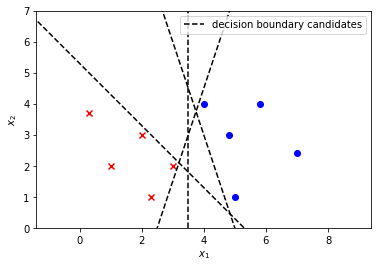

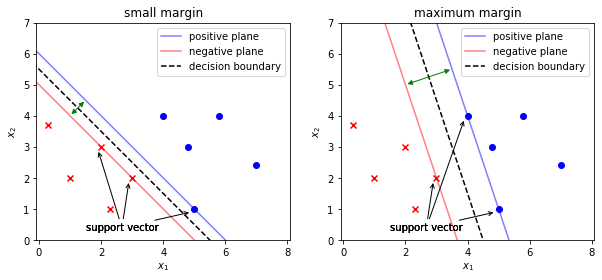

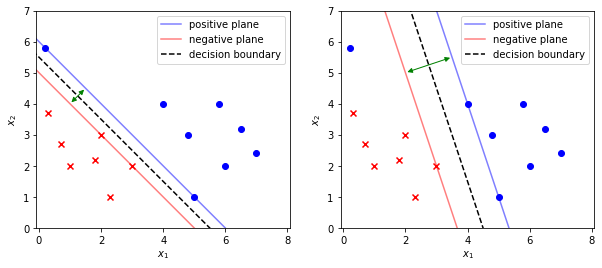

In [59]:
x_pos = np.array([[0.3, 3.7], [1, 2], [2.3, 1], [2, 3], [3, 2]])
x_neg = np.array([[7, 2.4], [4.8, 3], [5.8, 4], [5, 1], [4, 4]])

x_seq = np.arange(-5, 10, 0.1)
y_seq_pos = -3 * (x_seq - 5) + 1
y_seq_neg = -3 * (x_seq - 3) + 2
y_seq_mid = (y_seq_pos + y_seq_neg) / 2

plt.axes().set_aspect('equal', 'datalim')
plt.xlim([0, 8])
plt.ylim([0, 7])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(x_pos[:,0], x_pos[:,1], marker='x', c='red')
plt.scatter(x_neg[:,0], x_neg[:,1], marker='o', c='blue')
plt.plot(x_seq, y_seq_pos-1, c='black', linestyle='dashed', label='decision boundary candidates')
plt.plot(x_seq, 3*x_seq-7.5, c='black', linestyle='dashed')
plt.plot(x_seq, -x_seq+5.3, c='black', linestyle='dashed')
plt.plot(np.full(10, 3.5), np.arange(0,8,0.8), c='black', linestyle='dashed')
plt.legend(loc='upper right')
plt.show()



fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.set_aspect('equal', 'datalim')
axL.set_xlim([0, 8])
axL.set_ylim([0, 7])
axL.set_title('small margin')
axL.set_xlabel('$x_1$')
axL.set_ylabel('$x_2$')
axL.scatter(x_pos[:,0], x_pos[:,1], marker='x', c='red')
axL.scatter(x_neg[:,0], x_neg[:,1], marker='o', c='blue')
axL.plot(x_seq, -x_seq+6, c='blue', alpha=0.5, label='positive plane')
axL.plot(x_seq, -x_seq+5, c='red', alpha=0.5, label='negative plane')
axL.plot(x_seq, -x_seq+5.5, c='black', linestyle='dashed', label='decision boundary')
axL.legend()
axL.annotate('', xytext=[1,4], xy=[1.5, 4.5],
    arrowprops=dict(arrowstyle='<|-|>', connectionstyle='arc3', facecolor='green', edgecolor='green'))
axL.annotate('support vector', xytext=[1.5, 0.3], xy=[2.9, 1.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))
axL.annotate('support vector', xytext=[1.5, 0.3], xy=[1.9, 2.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))
axL.annotate('support vector', xytext=[1.5, 0.3], xy=[4.9, 0.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))

axR.set_aspect('equal', 'datalim')
axR.set_xlim([0, 8])
axR.set_ylim([0, 7])
axR.set_title('maximum margin')
axR.set_xlabel('$x_1$')
axR.set_ylabel('$x_2$')
axR.scatter(x_pos[:,0], x_pos[:,1], marker='x', c='red')
axR.scatter(x_neg[:,0], x_neg[:,1], marker='o', c='blue')
axR.plot(x_seq, y_seq_pos, c='blue', alpha=0.5, label='positive plane')
axR.plot(x_seq, y_seq_neg, c='red', alpha=0.5, label='negative plane')
axR.plot(x_seq, y_seq_mid, c='black', linestyle='dashed', label='decision boundary')
axR.legend()
axR.annotate('', xytext=[2, 5], xy=[3.5, 5.5],
    arrowprops=dict(arrowstyle='<|-|>', connectionstyle='arc3', facecolor='green', edgecolor='green'))
axR.annotate('support vector', xytext=[1.5, 0.3], xy=[2.9, 1.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))
axR.annotate('support vector', xytext=[1.5, 0.3], xy=[3.9, 3.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))
axR.annotate('support vector', xytext=[1.5, 0.3], xy=[4.9, 0.9],
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', facecolor='black', edgecolor='black'))

plt.show()




x_pos = np.vstack((x_pos, []))
x_neg = np.vstack((x_neg, []))

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

axL.set_aspect('equal', 'datalim')
axL.set_xlim([0, 8])
axL.set_ylim([0, 7])
#axL.set_title('large $C$')
axL.set_xlabel('$x_1$')
axL.set_ylabel('$x_2$')
axL.scatter(x_pos[:,0], x_pos[:,1], marker='x', c='red')
axL.scatter(x_neg[:,0], x_neg[:,1], marker='o', c='blue')
axL.plot(x_seq, -x_seq+6, c='blue', alpha=0.5, label='positive plane')
axL.plot(x_seq, -x_seq+5, c='red', alpha=0.5, label='negative plane')
axL.plot(x_seq, -x_seq+5.5, c='black', linestyle='dashed', label='decision boundary')
axL.legend()
axL.annotate('', xytext=[1,4], xy=[1.5, 4.5],
    arrowprops=dict(arrowstyle='<|-|>', connectionstyle='arc3', facecolor='green', edgecolor='green'))

axR.set_aspect('equal', 'datalim')
axR.set_xlim([0, 8])
axR.set_ylim([0, 7])
#axR.set_title('small $C$')
axR.set_xlabel('$x_1$')
axR.set_ylabel('$x_2$')
axR.scatter(x_pos[:,0], x_pos[:,1], marker='x', c='red')
axR.scatter(x_neg[:,0], x_neg[:,1], marker='o', c='blue')
axR.plot(x_seq, y_seq_pos, c='blue', alpha=0.5, label='positive plane')
axR.plot(x_seq, y_seq_neg, c='red', alpha=0.5, label='negative plane')
axR.plot(x_seq, y_seq_mid, c='black', linestyle='dashed', label='decision boundary')
axR.legend()
axR.annotate('', xytext=[2, 5], xy=[3.5, 5.5],
    arrowprops=dict(arrowstyle='<|-|>', connectionstyle='arc3', facecolor='green', edgecolor='green'))

plt.show()

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot(classifier, data, labels, title=None):
    colors = ['red', 'blue']
    x1max, x1min = np.max(data[:, 0]), np.min(data[:, 0])
    x2max, x2min = np.max(data[:, 1]), np.min(data[:, 1])
    scale_x1 = x1max - x1min
    scale_x2 = x2max - x2min
    x1max, x1min = x1max + (x1max-x1min)*0.05, x1min - (x1max-x1min)*0.05
    x2max, x2min = x2max + (x2max-x2min)*0.05, x2min - (x2max-x2min)*0.05
    resolution = scale_x1 / 300
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    z = np.array([classifier.predict(x) for x in np.array([xx1.ravel(), xx2.ravel()]).T])
    z = z.reshape(xx1.shape)
    if title is not None:
        plt.title(title)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors[::-1]))
    
    data_of_each_label = [[], []]
    for d, l in zip(data, labels):
        if l == 1:
            data_of_each_label[0].append(d)
        else:
            data_of_each_label[1].append(d)
    for i in range(len(data_of_each_label)):
        plt.scatter(np.array(data_of_each_label[i])[:, 0], np.array(data_of_each_label[i])[:, 1], s=5, c=colors[i])
    plt.show()

In [3]:
class HardMarginSVM:
    def __init__(self, d, eta=0.001, epoch=100):
        """
        Parameters
        ----------
        d : 次元（変数の数）
        eta : 学習率
        epoch : エポック
        """
        self.d = d
        self.eta = eta
        self.epoch = epoch
        self.w = np.zeros(d)
        self.b = 0
        self.trained = False
        
    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        if self.trained:
            x_st = self.__standardize(x)
            return 1 if np.dot(self.w, x_st)+self.b > 0 else -1
        else:
            raise Exception('This model is not trained.')
    
    def fit(self, data, labels):
        """
        Parameters
        ----------
        data : 学習データ
        labels : 学習データの教師ラベル
        """
        self.labels = labels
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = self.__standardize(data)
        self.lambdas = np.zeros(len(data))
        self.K = np.zeros([len(data), len(data)])
        for i in range(len(data)):
            for j in range(i, len(data)):
                k_ = np.dot(self.data[i], self.data[j])
                self.K[i][j] = k_
                self.K[j][i] = k_
        
        n_pos = np.count_nonzero(labels == 1)
        n_neg = len(labels) - n_pos

        # 双対問題を解く
        for t in range(self.epoch):
            cnt_0_pos, cnt_0_neg = self.__cycle()
            if  n_pos-cnt_0_pos == 1 and n_neg-cnt_0_neg == 1:
                break
        if cnt_0_pos < n_pos*0.9 or cnt_0_neg < n_neg*0.9:
            # 繰り返しが足りない？ 1割以上で lambda != 0
            print('[warn] Training not converged.')
            print('The number of support vectors (negative, positive) = ({}, {})'.format(n_pos-cnt_0_pos, n_neg-cnt_0_neg))
        
        # サポートベクトルを抽出
        i_sv = []
        for i in range(len(self.lambdas)):
            if self.lambdas[i] != 0:
                i_sv.append(i)
        # w を計算
        for i in i_sv:
            self.w -= self.lambdas[i] * self.labels[i] * self.data[i]
        # b を計算
        for i in i_sv:
            self.b += self.labels[i] - np.dot(self.w, self.data[i])
        self.b /= len(i_sv)
        # 学習完了のフラグを立てる
        self.trained = True
        
    def __cycle(self):
        """
        勾配降下法の1サイクル
        """
        dl = []
        cnt_0_pos_ = 0
        cnt_0_neg_ = 0
        for i in range(len(self.data)):
            dl_ = 1
            for j in range(len(self.data)):
                dl_ += self.lambdas[j] * self.labels[i] * self.labels[j] * self.K[i][j]
            dl_ *= -self.eta
            dl.append(dl_)
        self.lambdas += np.array(dl)
        for i in range(len(self.lambdas)):
            if self.lambdas[i] > 0:
                # lambda はゼロ以下の必要があるので正になったらゼロにする
                self.lambdas[i] = 0
                if self.labels[i] == 1:
                    cnt_0_pos_ += 1
                else:
                    cnt_0_neg_ += 1
        return cnt_0_pos_, cnt_0_neg_
    
    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

[warn] Training not converged.
The number of support vectors (negative, positive) = (11, 8)


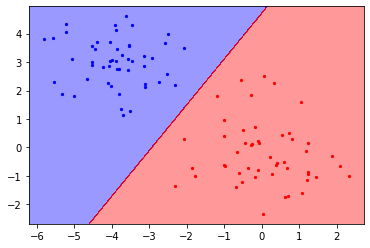

w: [ 1.54177416 -0.81642494]
b: 0.10083610288436107


In [11]:
N = 100
c1 = [0, 0]
c2 = [-4, 3]
r1 = 2.7*np.random.rand(N//2)
r2 = 2.0*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + c1[0], r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([r2 * np.sin(theta2) + c2[0], r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

svm = HardMarginSVM(2, epoch=1000, eta=0.001)
svm.fit(data, labels)
plot(svm, data, labels)
print('w: {}'.format(svm.w))
print('b: {}'.format(svm.b))

In [4]:
class SoftMarginSVM:
    def __init__(self, d, eta=0.001, epoch=100, C=1):
        """
        Parameters
        ----------
        d : 次元（変数の数）
        eta : 学習率
        epoch : エポック
        C : 誤分類に対するペナルティの大きさ
        """
        self.d = d
        self.eta = eta
        self.epoch = epoch
        self.C = C
        self.w = np.zeros(d)
        self.b = 0
        self.trained = False
        
    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        if self.trained:
            x_st = self.__standardize(x)
            return 1 if np.dot(self.w, x_st)+self.b > 0 else -1
        else:
            raise Exception('This model is not trained.')
    
    def fit(self, data, labels):
        """
        Parameters
        ----------
        data : 学習データ
        labels : 学習データの教師ラベル
        """
        self.labels = labels
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = self.__standardize(data)
        self.lambdas = np.zeros(len(data))
        self.K = np.zeros([len(data), len(data)])
        for i in range(len(data)):
            for j in range(i, len(data)):
                k_ = np.dot(self.data[i], self.data[j])
                self.K[i][j] = k_
                self.K[j][i] = k_
        
        n_pos = np.count_nonzero(labels == 1)
        n_neg = len(labels) - n_pos

        # 双対問題を解く
        for t in range(self.epoch):
            cnt_0_pos, cnt_0_neg = self.__cycle()
            if  n_pos-cnt_0_pos == 1 and n_neg-cnt_0_neg == 1:
                break
        
        # サポートベクトル / 超平面内部の点を抽出
        i_sv = []
        i_inner = []
        for i in range(len(self.lambdas)):
            if -self.C < self.lambdas[i] < 0:
                i_sv.append(i)
            elif self.lambdas[i] == -self.C:
                i_inner.append(i)
        # w を計算
        for i in i_sv:
            self.w -= self.lambdas[i] * self.labels[i] * self.data[i]
        for i in i_inner:
            self.w -= self.lambdas[i] * self.labels[i] * self.data[i]
        # b を計算
        for i in i_sv:
            self.b += self.labels[i] - np.dot(self.w, self.data[i])
        self.b /= len(i_sv)
        # 学習完了のフラグを立てる
        self.trained = True
        
    def __cycle(self):
        """
        勾配降下法の1サイクル
        """
        dl = []
        cnt_0_pos_ = 0
        cnt_0_neg_ = 0
        for i in range(len(self.data)):
            dl_ = 1
            for j in range(len(self.data)):
                dl_ += self.lambdas[j] * self.labels[i] * self.labels[j] * self.K[i][j]
            dl_ *= -self.eta
            dl.append(dl_)
        self.lambdas += np.array(dl)
        for i in range(len(self.lambdas)):
            if self.lambdas[i] > 0:
                # lambda はゼロ以下の必要があるので正になったらゼロにする
                self.lambdas[i] = 0
                if self.labels[i] == 1:
                    cnt_0_pos_ += 1
                else:
                    cnt_0_neg_ += 1
            if self.lambdas[i] < -self.C:
                self.lambdas[i] = -self.C
        return cnt_0_pos_, cnt_0_neg_
    
    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

In [24]:
N = 100
c1 = [0, 0]
c2 = [-5, 3]
r1 = 2.7*np.random.rand(N//2)
r2 = 2.0*np.random.rand(N//2)
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + c1[0], r1 * np.cos(theta1) + c1[1]]).T
data2 = np.array([r2 * np.sin(theta2) + c2[0], r2 * np.cos(theta2) + c2[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])
# 一部のデータを外れ値に
data[0] = [-6, 0]

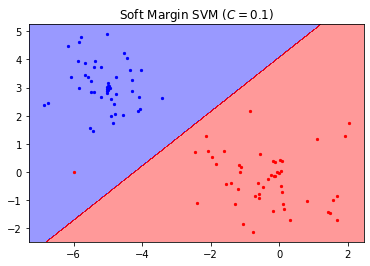

w: [ 0.88189257 -0.67002565]
b: -0.0032157991088527793


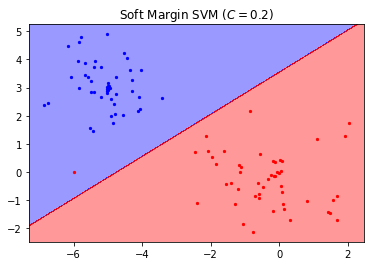

w: [ 0.93487908 -0.91696692]
b: 0.030408852763193217


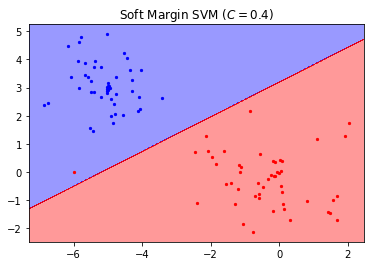

w: [ 0.93984321 -1.11798534]
b: 0.04368495922041219


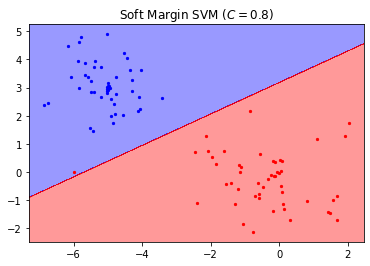

w: [ 0.95918372 -1.25843158]
b: 0.14703860362669


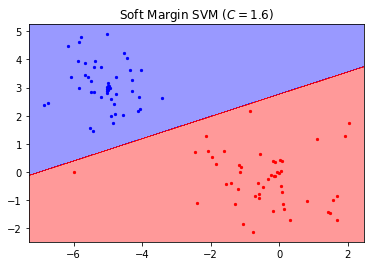

w: [ 0.78896712 -1.46318676]
b: 0.20086599361229387
[warn] Training not converged.
The number of support vectors (negative, positive) = (8, 9)


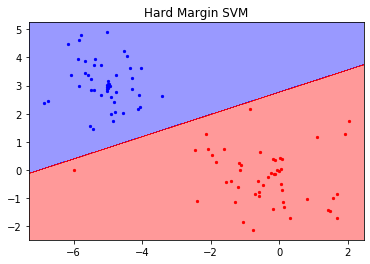

w: [ 0.78896712 -1.46318676]
b: 0.20086599361229387


In [29]:
for C in [0.1, 0.2, 0.4, 0.8, 1.6]:
    svm = SoftMarginSVM(2, epoch=1000, eta=0.001, C=C)
    svm.fit(data, labels)
    plot(svm, data, labels, title='Soft Margin SVM ($C = {}$)'.format(C))
    print('w: {}'.format(svm.w))
    print('b: {}'.format(svm.b))

svm = HardMarginSVM(2, epoch=1000, eta=0.001)
svm.fit(data, labels)
plot(svm, data, labels, title='Hard Margin SVM')
print('w: {}'.format(svm.w))
print('b: {}'.format(svm.b))

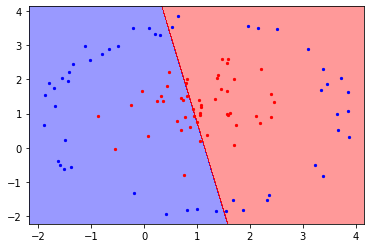

In [35]:
R1 = 2
R2 = 3
R_MARGIN = 0.4
C = (3, 5)
C = (1,1)

N = 100
r1 = R1*np.random.rand(N//2)
r2 = (R2-R1-R_MARGIN)*np.random.rand(N//2) + R1 + R_MARGIN
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + C[0], r1 * np.cos(theta1) + C[1]]).T
data2 = np.array([r2 * np.sin(theta2) + C[0], r2 * np.cos(theta2) + C[1]]).T

data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

svm = SoftMarginSVM(2, epoch=1000, eta=0.001, C=0.1)
svm.fit(data, labels)
plot(svm, data, labels)

In [2]:
class KernelSVM():
    def __init__(self, eta=0.001, epoch=100, C=1):
        """
        Parameters
        ----------
        eta : 学習率
        epoch : エポック
        C : 誤分類に対するペナルティの大きさ
        """
        self.eta = eta
        self.epoch = epoch
        self.C = C
        self.b = 0
        self.trained = False
        
    def predict(self, x):
        """
        Parameters
        ----------
        x : 分類したいデータ（d次元ベクトル）
        """
        if self.trained:
            x_st = self.__standardize(x)
            det = self.b
            for i in self.i_sv + self.i_inner:
                det -= self.lambdas[i] * self.labels[i] * self.__kernel_gaussian(self.data[i], x_st)
            return 1 if det > 0 else -1
        else:
            raise Exception('This model is not trained.')
    
    def fit(self, data, labels):
        """
        Parameters
        ----------
        data : 学習データ
        labels : 学習データの教師ラベル
        """
        self.labels = labels
        self.m = np.mean(data, axis=0)
        self.std = np.std(data, axis=0)
        self.data = self.__standardize(data)
        self.lambdas = np.zeros(len(data))
        self.K = np.zeros([len(data), len(data)])
        for i in range(len(data)):
            for j in range(i, len(data)):
                k_ = self.__kernel_gaussian(self.data[i], self.data[j])
                self.K[i][j] = k_
                self.K[j][i] = k_
        
        n_pos = np.count_nonzero(labels == 1)
        n_neg = len(labels) - n_pos

        # 双対問題を解く
        for t in range(self.epoch):
            cnt_0_pos, cnt_0_neg = self.__cycle()
            if  n_pos-cnt_0_pos == 1 and n_neg-cnt_0_neg == 1:
                break
        
        # サポートベクトル / 超平面内部の点を抽出
        self.i_sv = []
        self.i_inner = []
        for i in range(len(self.lambdas)):
            if -self.C < self.lambdas[i] < 0:
                self.i_sv.append(i)
            elif self.lambdas[i] == -self.C:
                self.i_inner.append(i)
        
        # b を計算
        for i in self.i_sv:
            self.b += self.labels[i]
            for j in self.i_sv + self.i_inner:
                self.b += self.lambdas[j] * self.labels[j] * self.K[j][i]
        self.b /= len(self.i_sv)

        # 学習完了のフラグを立てる
        self.trained = True
        
    def __cycle(self):
        """
        勾配降下法の1サイクル
        """
        dl = []
        cnt_0_pos_ = 0
        cnt_0_neg_ = 0
        for i in range(len(self.data)):
            dl_ = 1
            for j in range(len(self.data)):
                dl_ += self.lambdas[j] * self.labels[i] * self.labels[j] * self.K[i][j]
            dl_ *= -self.eta
            dl.append(dl_)
        self.lambdas += np.array(dl)
        for i in range(len(self.lambdas)):
            if self.lambdas[i] > 0:
                # lambda はゼロ以下である必要があるので正になったらゼロにする
                self.lambdas[i] = 0
                if self.labels[i] == 1:
                    cnt_0_pos_ += 1
                else:
                    cnt_0_neg_ += 1
            if self.lambdas[i] < -self.C:
                # lambda は -C 以上である必要があるので -C を下回ったら -C にする
                self.lambdas[i] = -self.C
        return cnt_0_pos_, cnt_0_neg_
    
    def __kernel_gaussian(self, x1, x2):
        """
        2つのデータサンプルのガウシアンカーネルを計算
        """
        return np.exp(- sum((x1-x2)**2) * 0.5)
    
    def __standardize(self, d):
        """
        データを標準化する
        """
        return (d - self.m) / self.std

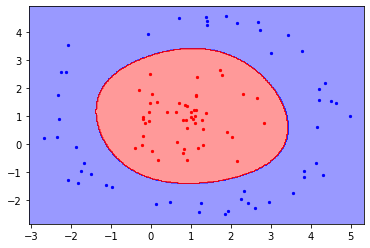

In [81]:
R1 = 2
R2 = 4
R_MARGIN = 1
C = (1,1)

N = 100
r1 = R1*np.random.rand(N//2)
r2 = (R2-R1-R_MARGIN)*np.random.rand(N//2) + R1 + R_MARGIN
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + C[0], r1 * np.cos(theta1) + C[1]]).T
data2 = np.array([r2 * np.sin(theta2) + C[0], r2 * np.cos(theta2) + C[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])

svm = KernelSVM(epoch=3000, eta=0.01, C=10)
svm.fit(data, labels)
plot(svm, data, labels)

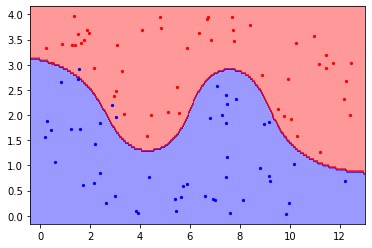

In [87]:
# 学習データ作成
N = 100
A = 4*np.pi
B = 4
x = np.random.rand(N) * A
y = np.random.rand(N) * B
data = np.array([x, y]).T
labels = np.array([1 if data[i][1]>np.sin(data[i][0])+B/2 else -1 for i in range(N)])

# 学習
svm = KernelSVM(epoch=3000, eta=0.01, C=10)
svm.fit(data, labels)
plot(svm, data, labels)

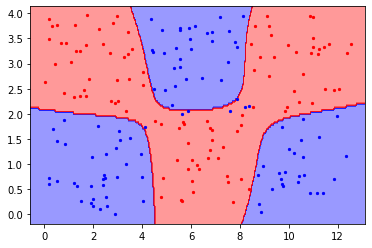

In [15]:
# 学習データ作成
N = 200
A = 4*np.pi
B = 4
x = np.random.rand(N) * A
y = np.random.rand(N) * B
data = np.array([x, y]).T
def get_label(d_):
    tmp_ = (d_[0] // (A/3) + d_[1] // (B/2)) % 2
    return 1 if tmp_ == 1 else -1
labels = np.array([get_label(data[i]) for i in range(N)])

# 学習
svm = KernelSVM(epoch=1000, eta=0.01, C=10)
svm.fit(data, labels)
plot(svm, data, labels)

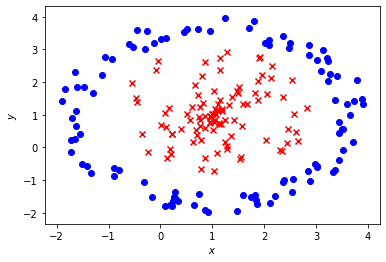

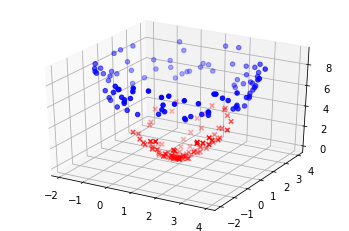

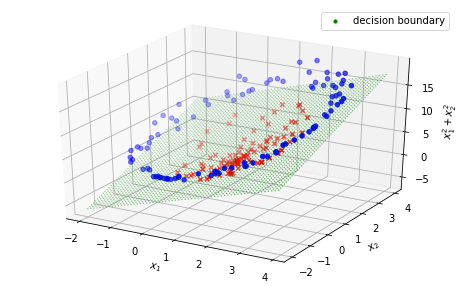

In [37]:
R1 = 2
R2 = 3
R_MARGIN = 0.4
C = (3, 5)
C = (1,1)

N = 200
r1 = R1*np.random.rand(N//2)
r2 = (R2-R1-R_MARGIN)*np.random.rand(N//2) + R1 + R_MARGIN
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + C[0], r1 * np.cos(theta1) + C[1]]).T
data2 = np.array([r2 * np.sin(theta2) + C[0], r2 * np.cos(theta2) + C[1]]).T

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.scatter(data1[:, 0], data1[:, 1], marker='x', c='r')
plt.scatter(data2[:, 0], data2[:, 1], marker='o', c='b')

plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data1[:, 0], data1[:, 1], (data1[:, 0]-C[0])**2+(data1[:, 1]-C[1])**2, marker='x', c='r')
ax.scatter(data2[:, 0], data2[:, 1], (data2[:, 0]-C[0])**2+(data2[:, 1]-C[1])**2, marker='o', c='b')
plt.show()


x_min, x_max = -2, 4
y_min, y_max = -2, 4
x = np.arange(x_min, x_max, 0.1)
y = np.arange(y_min, y_max, 0.1)
xyz = []
for x_ in x:
    for y_ in y:
        xyz.append([x_, y_, 2*x_+2*y_+2])
xyz = np.array(xyz)

fig = plt.figure(figsize=(8, 5))
#fig.subplots_adjust(right=0.2)
ax = fig.gca(projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2+x_2^2$', rotation=90)
ax.scatter(data1[:, 0], data1[:, 1], data1[:, 0]**2+data1[:, 1]**2, marker='x', c='r')
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 0]**2+data2[:, 1]**2, marker='o', c='b')
ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=0.1, c='g')
ax.scatter([], [], [], s=10, c='g', label='decision boundary')
#ax.view_init(elev=10, azim=130)
plt.legend()
plt.show()